## Lab 5: Time Alignment and Normalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

### Define the signals:

In [2]:
signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])

### 1. Plot both speech signals to observe their differences in length and amplitude patterns.

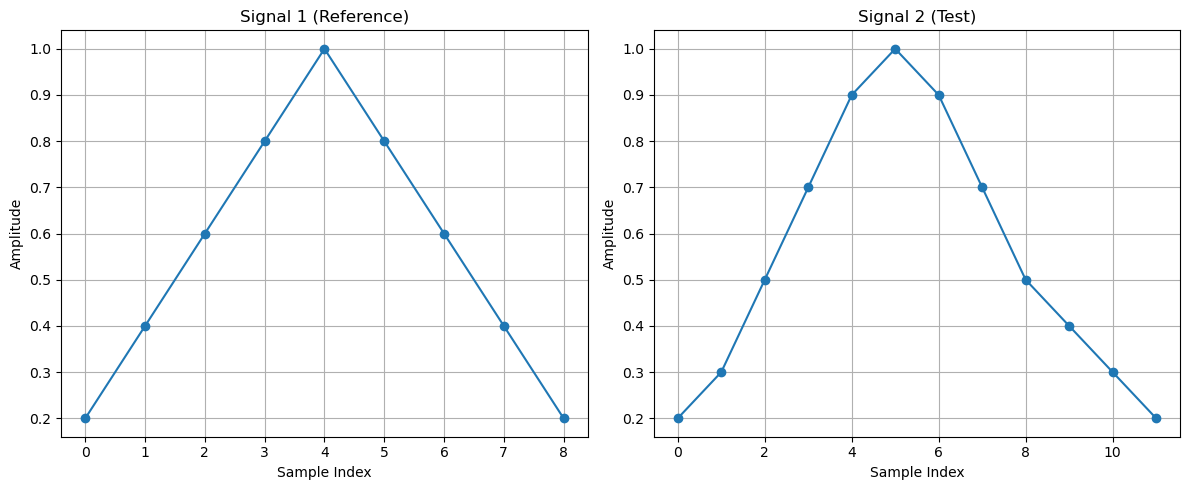

In [3]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(signal1, marker='o')
plt.title('Signal 1 (Reference)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(signal2, marker='o')
plt.title('Signal 2 (Test)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

### 2.  Perform Linear Time Normalization on Signal 2 to match the length of Signal 1.

#### To align the two signals, we will perform Linear Time Normalization by interpolating Signal 2 to match the length of Signal 1.

In [4]:
len1 = len(signal1)
len2 = len(signal2)

x_old = np.linspace(0, 1, len2)
f = interp1d(x_old, signal2, kind='linear') # Interpolate Signal 2 to match

x_new = np.linspace(0, 1, len1)
signal2_normalized = f(x_new)

#### We use linear interpolation to resample Signal 2 so that it has the same number of samples as Signal 1. This effectively compresses Signal 2 in time to match the duration of Signal 1.

### 3. Compute the alignment between Signal 1 and the normalized Signal 2

In [6]:
alignment = signal1 - signal2_normalized
mse = np.mean(alignment ** 2)
print(f"Mean Squared Error after Linear Time Normalization: {mse:.4f}")

Mean Squared Error after Linear Time Normalization: 0.0048


### 4. Plot the alignment path, showing how each sample in Signal 1 corresponds to a sample in Signal 2.

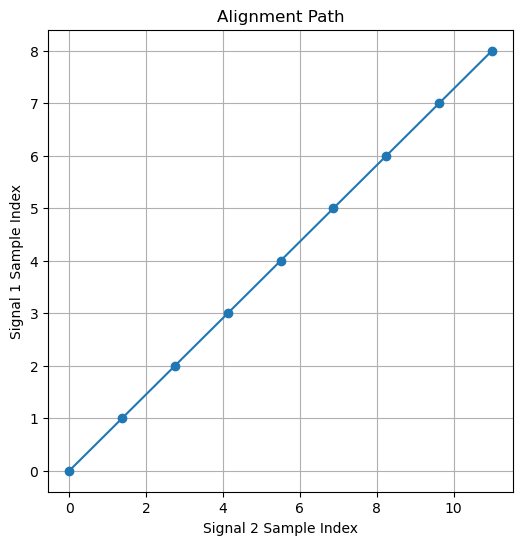

In [7]:
signal1_indices = np.arange(len1)
signal2_indices = np.linspace(0, len2 - 1, len1)

plt.figure(figsize=(6, 6))
plt.plot(signal2_indices, signal1_indices, marker='o')
plt.title('Alignment Path')
plt.xlabel('Signal 2 Sample Index')
plt.ylabel('Signal 1 Sample Index')
plt.grid(True)
plt.show()

#### The alignment path is a straight line, indicating a linear mapping between the sample indices of the two signals.

### 5. Write an inference on how Linear Time Normalization aligns the two speech signals.

Linear Time Normalization aligns the two speech signals by uniformly scaling the time
axis of Signal 2 so that it matches the length of Signal 1. This method assumes that the
speed difference between the two signals is consistent throughout the entire duration.
By interpolating Signal 2 to have the same number of samples as Signal 1, we effectively
compress its time scale.

However, LTN may not account for non-linear variations in speaking speed within
different parts of the word. For example, if certain phonemes are elongated more than
others, LTN may not perfectly align the signals. In such cases, more
sophisticated methods like Dynamic Time Warping (DTW) may provide better alignment by allowing for non-linear mappings between the time axes of the signals.